In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SSMTIA.utils import mapping, parameter_range
from scipy import stats
import math

In [12]:
df = pd.read_csv("analysis/not_uploaded/SSMTIA_mobilenet_test_scores_parsed.csv", nrows=10000000)

df["score"] = (df["styles_score"] + df["technical_score"] + df["composition_score"])/3

df

,img,parameter,change,styles_score,technical_score,composition_score,pred_change,pred_change_degree,score
0,abbey-glass-religion-architecture-106158.jpeg,original,0.0,0.4668,0.6313,0.3489,contrast,-0.045085,0.482333
1,abraham-lincoln-lincoln-memorial-washington-dc...,original,0.0,0.9463,0.9880,0.7950,contrast,0.050945,0.909767
2,abstract-background-backgrounds-botany-87770.jpeg,original,0.0,0.9040,0.9966,0.6380,contrast,0.127809,0.846200
3,adler-bird-bird-of-prey-raptor-53587.jpeg,original,0.0,0.2717,0.9310,0.0584,contrast,0.019672,0.420367
4,adult-cute-face-female-41522.jpeg,original,0.0,0.8030,0.9277,0.6816,contrast,-0.073145,0.804100
...,...,...,...,...,...,...,...,...,...
9999995,pexels-photo-2898866.jpeg,vcrop,-4.0,0.1497,0.9307,0.4045,shadows,-0.043705,0.494967
9999996,pexels-photo-2898870.jpeg,vcrop,-4.0,0.9604,0.9470,0.7240,shadows,-0.010905,0.877133
9999997,pexels-photo-2899099.jpeg,vcrop,-4.0,0.6270,0.9565,0.7430,shadows,-0.023650,0.775500
9999998,pexels-photo-2899100.jpeg,vcrop,-4.0,0.8700,0.8690,0.5825,shadows,-0.022593,0.773833


In [5]:
pd.DataFrame(df[df["parameter"] != "original"][["img", "styles_score", "technical_score", "composition_score", "score"]].groupby("img").max().to_records()).sort_values("img")

,img,styles_score,technical_score,composition_score,score
0,abbey-glass-religion-architecture-106158.jpeg,0.8096,0.9430,0.4634,0.665600
1,abraham-lincoln-lincoln-memorial-washington-dc...,0.9937,0.9980,0.9976,0.993767
2,abstract-background-backgrounds-botany-87770.jpeg,0.9300,0.9995,0.8755,0.900933
3,adler-bird-bird-of-prey-raptor-53587.jpeg,0.8125,0.9775,0.3945,0.684000
4,adult-cute-face-female-41522.jpeg,0.9834,0.9966,0.9736,0.980133
...,...,...,...,...,...
545,pexels-photo-1002062.jpeg,0.7236,0.9620,0.3904,0.628533
546,pexels-photo-1002219.jpeg,0.9260,1.0000,0.8574,0.913667
547,pexels-photo-1002638.jpeg,0.9834,0.9090,0.9165,0.916667
548,pexels-photo-1002669.jpeg,1.0000,0.9810,1.0000,0.993667


In [6]:
df[df["parameter"] == "original"][["img", "styles_score", "technical_score", "composition_score", "score"]].sort_values("img").reset_index()

,index,img,styles_score,technical_score,composition_score,score
0,0,abbey-glass-religion-architecture-106158.jpeg,0.4668,0.6313,0.3489,0.482333
1,1,abraham-lincoln-lincoln-memorial-washington-dc...,0.9463,0.9880,0.7950,0.909767
2,2,abstract-background-backgrounds-botany-87770.jpeg,0.9040,0.9966,0.6380,0.846200
3,3,adler-bird-bird-of-prey-raptor-53587.jpeg,0.2717,0.9310,0.0584,0.420367
4,4,adult-cute-face-female-41522.jpeg,0.8030,0.9277,0.6816,0.804100
...,...,...,...,...,...,...
545,96095,pexels-photo-1002062.jpeg,0.5186,0.9385,0.1934,0.550167
546,96096,pexels-photo-1002219.jpeg,0.4006,0.9990,0.7470,0.715533
547,96097,pexels-photo-1002638.jpeg,0.9536,0.7450,0.6094,0.769333
548,96098,pexels-photo-1002669.jpeg,1.0000,0.7230,0.9995,0.907500


In [5]:
# & (df["parameter"] != "pixelate") & (df["parameter"] != "impulse_noise")
scores = pd.DataFrame(df[(df["parameter"] != "original")][["img", "styles_score", "technical_score", "composition_score"]].groupby("img").max().to_records()).sort_values("img").rename(columns={"styles_score":"best_score_styles", "technical_score":"best_score_technical", "composition_score":"best_score_composition"})
scores["orig_score_styles"] = df[df["parameter"] == "original"][["img", "styles_score"]].sort_values("img").reset_index()["styles_score"]
scores["orig_score_technical"] = df[df["parameter"] == "original"][["img", "technical_score"]].sort_values("img").reset_index()["technical_score"]
scores["orig_score_composition"] = df[df["parameter"] == "original"][["img", "composition_score"]].sort_values("img").reset_index()["composition_score"]
scores["diff_styles"] = scores["orig_score_styles"] - scores["best_score_styles"]
scores["diff_technical"] = scores["orig_score_technical"] - scores["best_score_technical"]
scores["diff_composition"] = scores["orig_score_composition"] - scores["best_score_composition"]
scores

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
0,SW_Pamela%2BWebb.jpg,0.938477,0.976562,0.583496,0.786621,0.666992,0.100281,-0.151855,-0.309570,-0.483154
1,abbey-glass-religion-architecture-106158.jpeg,0.809570,0.942871,0.463379,0.466797,0.631348,0.348877,-0.342773,-0.311523,-0.114502
2,abraham-lincoln-lincoln-memorial-washington-dc...,0.993652,0.998047,0.997559,0.946289,0.987793,0.794922,-0.047363,-0.010254,-0.202637
3,abstract-background-backgrounds-botany-87770.jpeg,0.930176,0.999512,0.875488,0.903809,0.996582,0.638184,-0.026367,-0.002930,-0.237305
4,adler-bird-bird-of-prey-raptor-53587.jpeg,0.812500,0.977539,0.394531,0.271729,0.931152,0.058411,-0.541016,-0.046387,-0.336182
...,...,...,...,...,...,...,...,...,...,...
14995,wood-painting-window-cactus-6689.jpg,0.923340,0.983398,0.874023,0.770996,0.909180,0.613770,-0.152344,-0.074219,-0.260254
14996,wood-sky-forest-autumn.jpg,1.000000,0.974121,1.000000,1.000000,0.867188,0.998047,0.000000,-0.106934,-0.001953
14997,wood-stool-wooden-wine.jpg,0.971680,1.000000,0.879883,0.887695,0.994629,0.562988,-0.083984,-0.005371,-0.316895
14998,wood-tree-brown-bark.jpg,0.872070,0.929688,0.357422,0.405029,0.775879,0.117981,-0.467041,-0.153809,-0.239502


In [6]:
scores.nlargest(10, "diff_styles")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
3617,pexels-photo-1591930.jpeg,0.869629,0.990723,0.677734,0.878418,0.968750,0.518555,0.008789,-0.021973,-0.159180
13514,pexels-photo-757923.jpeg,0.935059,0.990234,0.832520,0.941406,0.972168,0.561523,0.006348,-0.018066,-0.270996
8814,pexels-photo-2707010.jpeg,0.896973,0.998535,0.240356,0.900879,0.995605,0.153564,0.003906,-0.002930,-0.086792
12234,pexels-photo-374852.jpeg,0.989746,0.947754,0.951172,0.990723,0.777832,0.888184,0.000977,-0.169922,-0.062988
2480,pexels-photo-1346089.jpeg,0.986816,0.999023,0.669434,0.987305,0.991699,0.533203,0.000488,-0.007324,-0.136230
17,american-football-football-football-player-qua...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999512,0.000000,0.000000,-0.000488
23,animal-cute-kitten-cat.jpg,1.000000,0.990234,1.000000,1.000000,0.925781,1.000000,0.000000,-0.064453,0.000000
40,at-night-under-a-lantern-guy-night-city-163790...,1.000000,0.937988,1.000000,1.000000,0.723633,0.995117,0.000000,-0.214355,-0.004883
41,attractive-beautiful-brunette-cute-41539.jpeg,1.000000,0.999512,1.000000,1.000000,0.999023,1.000000,0.000000,-0.000488,0.000000
51,bald-eagle-bird-predator-feathered-68603.jpeg,1.000000,0.998535,1.000000,1.000000,0.976074,0.998535,0.000000,-0.022461,-0.001465


In [7]:
scores.nlargest(10, "diff_technical")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
3626,pexels-photo-1595233.jpeg,0.925293,0.973633,0.227539,0.751953,0.981445,0.116455,-0.173340,0.007812,-0.111084
220,fashion-person-woman-taking-photo.jpg,0.875488,0.997070,0.643555,0.760742,0.997559,0.519043,-0.114746,0.000488,-0.124512
8007,pexels-photo-2505972.jpeg,0.950684,0.997559,0.524414,0.898926,0.998047,0.273682,-0.051758,0.000488,-0.250732
17,american-football-football-football-player-qua...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999512,0.000000,0.000000,-0.000488
35,architecture-beautiful-building-church-87742.jpeg,0.999512,1.000000,0.971191,0.950684,1.000000,0.716309,-0.048828,0.000000,-0.254883
110,camera-vintage-lens-design.jpg,0.905762,1.000000,0.792480,0.660645,1.000000,0.553711,-0.245117,0.000000,-0.238770
284,girl-young-blue-eyes-eyes-39295.jpeg,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
306,hand-taking-photo-photography-vintage.jpg,0.979004,1.000000,0.862793,0.933594,1.000000,0.612305,-0.045410,0.000000,-0.250488
379,lights-abstract-blur-orange.jpg,0.816895,1.000000,0.395752,0.555664,1.000000,0.291992,-0.261230,0.000000,-0.103760
380,lights-night-firework-new-year-s-eve.jpg,0.995117,1.000000,0.926758,0.956055,1.000000,0.925781,-0.039062,0.000000,-0.000977


In [8]:
scores.nlargest(10, "diff_composition")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
23,animal-cute-kitten-cat.jpg,1.0,0.990234,1.0,1.0,0.925781,1.0,0.0,-0.064453,0.0
41,attractive-beautiful-brunette-cute-41539.jpeg,1.0,0.999512,1.0,1.0,0.999023,1.0,0.0,-0.000488,0.0
60,beauty-cold-elegance-face-41207.jpeg,1.0,0.991211,1.0,1.0,0.937012,1.0,0.0,-0.054199,0.0
76,black-and-white-fence-crime-forbidden.jpg,1.0,0.980469,1.0,1.0,0.937012,1.0,0.0,-0.043457,0.0
101,butterbur-petasites-composites-forest-flower-1...,1.0,0.998535,1.0,1.0,0.931152,1.0,0.0,-0.067383,0.0
105,camcorder-camera-digital-equipment-41550.jpeg,1.0,1.000000,1.0,1.0,0.993164,1.0,0.0,-0.006836,0.0
114,car-music-audio-controls.jpg,1.0,0.983887,1.0,1.0,0.875977,1.0,0.0,-0.107910,0.0
122,cheesecake-table-dessert-cream-162688.jpeg,1.0,0.954590,1.0,1.0,0.875977,1.0,0.0,-0.078613,0.0
123,cherries-in-a-bowl-fruit-summer-breakfast.jpg,1.0,0.989746,1.0,1.0,0.913086,1.0,0.0,-0.076660,0.0
126,chillies-cans-chili-pepper-spicy.jpg,1.0,0.999023,1.0,1.0,0.981934,1.0,0.0,-0.017090,0.0


In [9]:
scores.nsmallest(10, "diff_styles")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
12963,pexels-photo-654692.jpeg,0.960938,0.947266,0.979980,0.039246,0.541504,0.302979,-0.921875,-0.405762,-0.676758
10671,pexels-photo-318426.jpeg,0.995117,0.886719,0.842773,0.074768,0.721680,0.268311,-0.920410,-0.165039,-0.574219
2398,pexels-photo-1329001.jpeg,0.962402,0.992188,0.605957,0.079956,0.959473,0.401855,-0.882324,-0.032715,-0.204102
2684,pexels-photo-1396133.jpeg,0.987305,0.977051,0.573730,0.111450,0.668945,0.198242,-0.875977,-0.308105,-0.375488
4822,pexels-photo-1821758.png,0.984375,0.995605,0.683594,0.109009,0.902344,0.474609,-0.875488,-0.093262,-0.208984
2223,pexels-photo-129731.jpeg,0.999023,0.999023,0.867188,0.123779,0.599121,0.566406,-0.875000,-0.399902,-0.300781
3944,pexels-photo-1653825.jpeg,0.950195,0.842285,0.296143,0.077148,0.529297,0.054443,-0.873047,-0.312988,-0.241699
8582,pexels-photo-2642692.jpeg,0.973633,0.999512,0.985840,0.101746,0.953125,0.544434,-0.872070,-0.046387,-0.441406
897,pexels-photo-105003.jpeg,0.901367,0.999023,0.367676,0.033630,0.997070,0.076233,-0.867676,-0.001953,-0.291504
4585,pexels-photo-1767727.jpeg,0.999512,1.000000,0.833496,0.135254,0.843750,0.182983,-0.864258,-0.156250,-0.650391


In [10]:
scores.nsmallest(10, "diff_technical")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
10415,pexels-photo-3092138.jpeg,1.000000,0.924805,1.000000,1.000000,0.022095,1.000000,0.000000,-0.902832,0.000000
9501,pexels-photo-2878709.jpeg,1.000000,0.924316,1.000000,1.000000,0.094482,1.000000,0.000000,-0.830078,0.000000
684,pexels-photo-1022922.jpeg,0.839844,0.905762,0.676758,0.628418,0.089355,0.050507,-0.211426,-0.816406,-0.626465
11642,pexels-photo-3526843.jpeg,1.000000,0.878418,1.000000,1.000000,0.063232,1.000000,0.000000,-0.815430,0.000000
12133,pexels-photo-3641969.jpeg,1.000000,0.877930,1.000000,1.000000,0.109863,1.000000,0.000000,-0.768066,0.000000
3373,pexels-photo-154510.jpeg,0.999512,0.942383,0.997070,0.948242,0.178711,0.437256,-0.051270,-0.763672,-0.559570
14197,pexels-photo-907169.jpeg,0.875488,0.958496,0.493408,0.300537,0.208984,0.122253,-0.575195,-0.749512,-0.371094
4492,pexels-photo-1748599.jpeg,1.000000,0.906738,1.000000,1.000000,0.161743,0.996582,0.000000,-0.745117,-0.003418
1087,pexels-photo-1080400.jpeg,0.962891,0.954102,0.803711,0.728516,0.213745,0.476562,-0.234375,-0.740234,-0.327148
77,black-and-white-restaurant-lunch-kitchen.jpg,0.910156,0.992188,0.669922,0.319092,0.252930,0.176270,-0.590820,-0.739258,-0.493652


In [11]:
scores.nsmallest(10, "diff_composition")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
3627,pexels-photo-1595245.jpeg,1.000000,0.942871,1.000000,0.474121,0.298340,0.046326,-0.525879,-0.644531,-0.953613
7665,pexels-photo-2432189.jpeg,1.000000,0.980957,1.000000,0.314697,0.900391,0.067139,-0.685547,-0.080566,-0.932617
272,gecko-rough-knob-lizard-australia-94271.jpeg,0.953613,0.787598,0.997070,0.364746,0.622559,0.073181,-0.588867,-0.165039,-0.923828
4361,pexels-photo-1715507.jpeg,1.000000,0.903809,1.000000,0.923828,0.503906,0.101501,-0.076172,-0.399902,-0.898438
10560,pexels-photo-3152184.jpeg,0.991211,0.994141,0.945801,0.326660,0.867676,0.054565,-0.664551,-0.126465,-0.891113
10294,pexels-photo-3059507.jpeg,0.912598,0.941406,0.913086,0.101746,0.659668,0.045959,-0.811035,-0.281738,-0.867188
703,pexels-photo-1025586.jpeg,1.000000,0.971191,1.000000,0.893066,0.783691,0.139282,-0.106934,-0.187500,-0.860840
5901,pexels-photo-208414.jpeg,0.950195,0.978027,0.958984,0.332520,0.831543,0.121643,-0.617676,-0.146484,-0.837402
9899,pexels-photo-2955816.jpeg,0.937988,0.987305,0.963867,0.870117,0.569824,0.128662,-0.067871,-0.417480,-0.834961
10514,pexels-photo-3139074.jpeg,1.000000,0.894531,1.000000,0.333496,0.497803,0.181641,-0.666504,-0.396729,-0.818359


In [12]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_styles").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["styles_score"] == row.best_score_styles)])
pd.concat(nsmall)

,img,parameter,change,styles_score,technical_score,composition_score,styles_change_strength,technical_change_strength,composition_change_strength
2371337,pexels-photo-654692.jpeg,exposure,1.20,0.960938,0.033875,0.354736,"[-0.3595561981201172, -0.00015497952699661255,...","[0.021540619432926178, 0.005717795342206955, 0...","[-0.006392172537744045, 0.018646545708179474, ..."
1951545,pexels-photo-318426.jpeg,motion_blur,1.00,0.995117,0.455566,0.831055,"[-0.037925489246845245, -0.10281362384557724, ...","[0.008324902504682541, 0.0008170073851943016, ...","[-0.027919327840209007, 0.005091802217066288, ..."
1951620,pexels-photo-318426.jpeg,motion_blur,4.00,0.995117,0.460938,0.831055,"[-0.03497966378927231, -0.0993058905005455, 0....","[0.0086442269384861, 0.0007659328985027969, 0....","[-0.027548175305128098, 0.004737913608551025, ..."
1951645,pexels-photo-318426.jpeg,motion_blur,5.00,0.995117,0.477783,0.787109,"[-0.035132329910993576, -0.09133002161979675, ...","[0.009321516379714012, 0.0008116396493278444, ...","[-0.026018723845481873, 0.005133416969329119, ..."
436722,pexels-photo-1329001.jpeg,tint,0.75,0.962402,0.990234,0.262939,"[-0.010430162772536278, 0.04818859323859215, -...","[0.049711450934410095, 0.04400229826569557, 0....","[-0.002129162661731243, -0.004800563212484121,..."
492208,pexels-photo-1396133.jpeg,motion_blur,5.00,0.987305,0.434814,0.573730,"[-0.06408075243234634, -0.056165341287851334, ...","[0.011661795899271965, 0.0014517133822664618, ...","[-0.02318991720676422, 0.009522880427539349, -..."
880496,pexels-photo-1821758.png,tint,0.75,0.984375,0.986328,0.481445,"[0.07305704802274704, -0.0070839570835232735, ...","[0.07109923660755157, 0.035780277103185654, 0....","[-0.01357301790267229, -0.0149458022788167, 0...."
404172,pexels-photo-129731.jpeg,exposure,3.00,0.999023,0.970215,0.798340,"[-0.03111647628247738, -0.24134407937526703, 0...","[0.00323123880662024, 4.0492877815268e-06, 0.0...","[-0.06007720157504082, 0.012525857426226139, 0..."
720393,pexels-photo-1653825.jpeg,tint,0.80,0.950195,0.744629,0.124634,"[0.015692714601755142, -0.03309951350092888, -...","[0.06554260849952698, 0.08966949582099915, 0.1...","[-0.030087120831012726, -0.003234253730624914,..."
1570981,pexels-photo-2642692.jpeg,temperature,3000.00,0.973633,0.999512,0.888672,"[-0.0016571827000007033, -0.03832318261265755,...","[0.05897993594408035, 0.01896967552602291, 0.0...","[-0.008924325928092003, -0.01266959123313427, ..."


In [13]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_technical").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["technical_score"] == row.best_score_technical)])
pd.concat(nsmall)

,img,parameter,change,styles_score,technical_score,composition_score,styles_change_strength,technical_change_strength,composition_change_strength
1906264,pexels-photo-3092138.jpeg,impulse_noise,5.00,1.000000,0.924805,1.000000,"[-0.13486789166927338, 0.048317648470401764, -...","[0.002812361577525735, 2.160849817300914e-06, ...","[-0.01429902482777834, -0.027741296216845512, ..."
1742675,pexels-photo-2878709.jpeg,rightcornerscrop,-1.00,1.000000,0.924316,1.000000,"[-0.1626766473054886, 0.05539509654045105, -0....","[0.0026895925402641296, 4.325729150878033e-06,...","[0.00501417787745595, 0.011758978478610516, -0..."
124858,pexels-photo-1022922.jpeg,exposure,-3.00,0.288330,0.905762,0.305908,"[0.013892006129026413, -0.01405916828662157, -...","[0.07617776840925217, 0.051368050277233124, 0....","[0.0018285916885361075, 0.009323766455054283, ..."
2129116,pexels-photo-3526843.jpeg,temperature,2000.00,1.000000,0.878418,0.998535,"[-0.09235307574272156, -0.05242793262004852, 0...","[0.015446435660123825, 0.00015489653742406517,...","[-0.013546712696552277, -0.009258262813091278,..."
2221807,pexels-photo-3641969.jpeg,gaussian_noise,5.00,1.000000,0.877930,1.000000,"[-0.20459148287773132, 0.05970209091901779, -0...","[0.0041208891198039055, 1.6600271919742227e-05...","[-0.016993064433336258, -0.014001348055899143,..."
614547,pexels-photo-154510.jpeg,exposure,1.20,0.996094,0.942383,0.929688,"[0.0006044618203304708, -0.23522254824638367, ...","[0.02803453989326954, 2.116297764587216e-05, 0...","[0.0009438797715120018, 0.002218286506831646, ..."
2598571,pexels-photo-907169.jpeg,ratio,4.00,0.729492,0.958496,0.081604,"[-0.08128602057695389, -0.017475252971053123, ...","[0.03436930850148201, 0.08007393032312393, 0.2...","[-5.912641063332558e-05, 0.0013352028327062726..."
818966,pexels-photo-1748599.jpeg,contrast,-1.00,1.000000,0.906738,1.000000,"[-0.10451313108205795, 0.07214155793190002, -0...","[0.017528098076581955, 5.624636401080352e-07, ...","[0.002066664630547166, -0.019179992377758026, ..."
198811,pexels-photo-1080400.jpeg,tint,0.75,0.962891,0.954102,0.443604,"[0.10319111496210098, -0.14629817008972168, 0....","[0.03588683158159256, 0.00509982043877244, 0.0...","[-0.010999659076333046, -0.012332546524703503,..."
15276,black-and-white-restaurant-lunch-kitchen.jpg,exposure,3.00,0.771484,0.992188,0.612793,"[0.07559853792190552, -0.15819025039672852, 0....","[0.043296072632074356, 0.000161650576046668, 0...","[-0.011973416432738304, 0.01833890564739704, 0..."


In [14]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_composition").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["composition_score"] == row.best_score_composition)])
pd.concat(nsmall)

,img,parameter,change,styles_score,technical_score,composition_score,styles_change_strength,technical_change_strength,composition_change_strength
663401,pexels-photo-1595245.jpeg,contrast,-1.0,1.000000,0.657227,1.000000,"[-0.19730326533317566, 0.10899853706359863, -0...","[0.021795574575662613, 7.606917642988265e-05, ...","[0.01734766736626625, 0.0018077242420986295, -..."
663426,pexels-photo-1595245.jpeg,contrast,-0.8,1.000000,0.896484,1.000000,"[-0.18713535368442535, 0.12347772717475891, -0...","[0.01498144306242466, 6.311064680630807e-06, 0...","[0.03354845196008682, 0.0018615913577377796, -..."
663451,pexels-photo-1595245.jpeg,contrast,-0.6,1.000000,0.938477,1.000000,"[-0.10202381014823914, 0.06835022568702698, -0...","[0.022646412253379822, 3.353031206643209e-05, ...","[0.025287646800279617, -0.0033346505369991064,..."
666201,pexels-photo-1595245.jpeg,gaussian_noise,1.0,1.000000,0.782715,1.000000,"[-0.10016032308340073, 0.02408917434513569, -0...","[0.006281991023570299, 0.0008760856580920517, ...","[0.007462123408913612, -0.019643526524305344, ..."
666226,pexels-photo-1595245.jpeg,gaussian_noise,2.0,1.000000,0.710449,1.000000,"[-0.1325976401567459, 0.03835829719901085, -0....","[0.00460053002461791, 0.0013046893291175365, 0...","[0.006858792155981064, -0.009511216543614864, ..."
666251,pexels-photo-1595245.jpeg,gaussian_noise,3.0,1.000000,0.716309,1.000000,"[-0.1872844249010086, 0.08043453842401505, -0....","[0.0036701769568026066, 0.0010284881573170424,...","[0.010472181253135204, -0.007483877241611481, ..."
666276,pexels-photo-1595245.jpeg,gaussian_noise,4.0,1.000000,0.778809,1.000000,"[-0.18005020916461945, 0.07908063381910324, -0...","[0.001683044945821166, 6.987052984186448e-06, ...","[0.01576041243970394, -0.01033626589924097, 0...."
666301,pexels-photo-1595245.jpeg,gaussian_noise,5.0,1.000000,0.792969,1.000000,"[-0.1078992486000061, 0.019441401585936546, -0...","[0.004398456774652004, 1.4739389371243306e-05,...","[0.011199812404811382, -0.0024012578651309013,..."
666376,pexels-photo-1595245.jpeg,impulse_noise,3.0,1.000000,0.808594,1.000000,"[-0.1040896326303482, 0.03166742995381355, 0.0...","[0.014422379434108734, 0.0003779143444262445, ...","[-0.017004599794745445, 0.00019461987540125847..."
666401,pexels-photo-1595245.jpeg,impulse_noise,4.0,1.000000,0.583008,1.000000,"[-0.12363611161708832, 0.02938120998442173, -0...","[0.036797020584344864, 0.00029778038151562214,...","[-0.012599093839526176, 0.005422250367701054, ..."


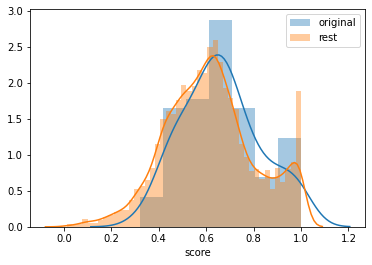

In [37]:
sns.distplot(df[df["parameter"] == "original"]["score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["score"], label="rest")
plt.legend()

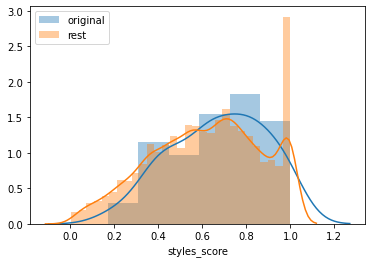

In [10]:
sns.distplot(df[df["parameter"] == "original"]["styles_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["styles_score"], label="rest")
plt.legend()

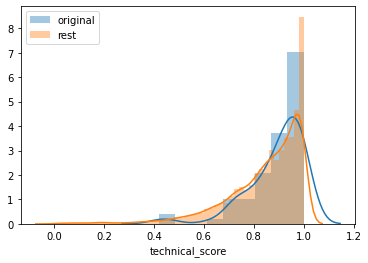

In [11]:
sns.distplot(df[df["parameter"] == "original"]["technical_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["technical_score"], label="rest")
plt.legend()

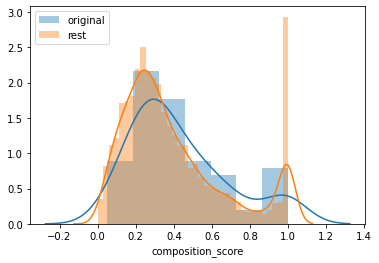

In [12]:
sns.distplot(df[df["parameter"] == "original"]["composition_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["composition_score"], label="rest")
plt.legend()

In [13]:
def histogram_distortion(distortion:str, score:str):
    sns.distplot(df[df["parameter"] == "original"][score], label="original")
    for change in (val for val in mapping["all_changes"] if distortion in val):
        parameter, change = change.split(";")
        sns.distplot(df[(df["parameter"] == parameter) & (df["change"] == float(change))][score], label=f"{parameter}: {change}")
    plt.legend()

In [14]:
def violin_distortion(distortion:str, score:str):
    plot_frame = df[(df["parameter"] == distortion) | (df["parameter"] == "original")]
    if distortion in parameter_range:
        plot_frame.loc[plot_frame["parameter"] == "original", "change"] = parameter_range[distortion]["default"]
    sns.violinplot(data=plot_frame, x="change", y=score, color="steelblue")

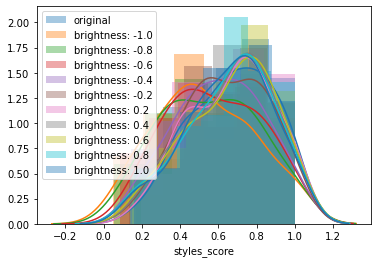

In [15]:
histogram_distortion("brightness", "styles_score")

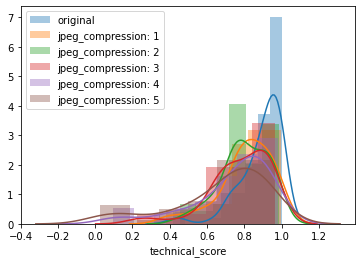

In [16]:
histogram_distortion("jpeg_compression", "technical_score")

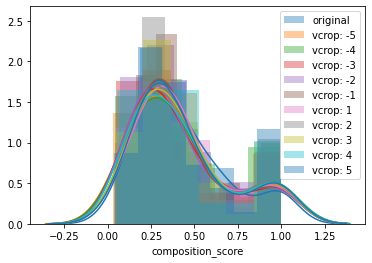

In [17]:
histogram_distortion("vcrop", "composition_score")

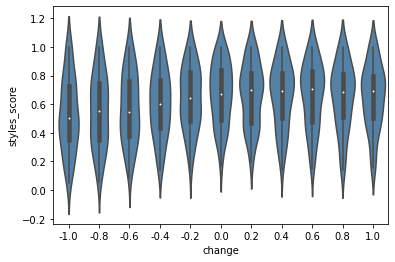

In [18]:
violin_distortion("brightness", "styles_score")

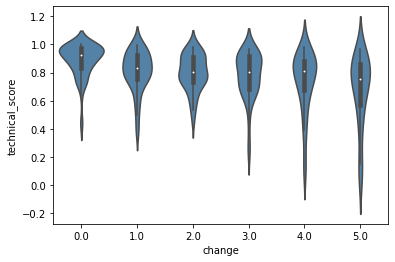

In [19]:
violin_distortion("jpeg_compression", "technical_score")

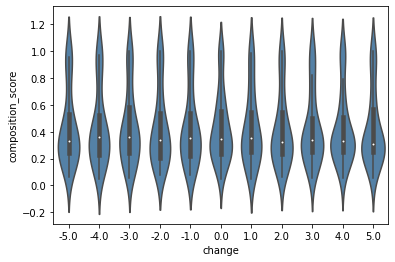

In [20]:
violin_distortion("hcrop", "composition_score")

In [33]:
def violin_changes():
    fig, axs = plt.subplots(nrows=1, ncols=3)
    for dist_i, distortion in enumerate(["styles", "technical", "composition"]):
        original_frame = df[df["parameter"] == "original"]
        results = []
        df_index = list(original_frame.columns).index(f"{distortion}_change_strength")
        for index, row in original_frame.iterrows():
            for i, k in enumerate(mapping[distortion].keys()):
                results.append({"distortion":distortion, "change_predict": k, "change_strength":row[df_index][i]})
        results = (pd.DataFrame([val], columns=val.keys()) for val in results)
        sns.violinplot(data=pd.concat(results, ignore_index=True), x="change_predict", y="change_strength", color="steelblue", ax=axs[dist_i])
        axs[dist_i].tick_params(axis='x', labelrotation=75)
        axs[dist_i].hlines(0, 0, 8, colors="grey")

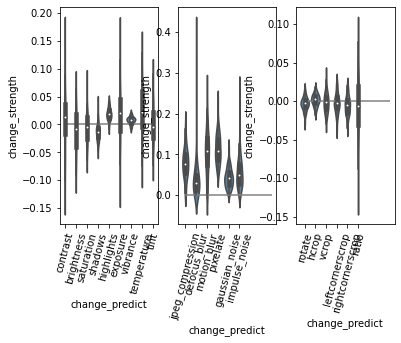

In [34]:
violin_changes()

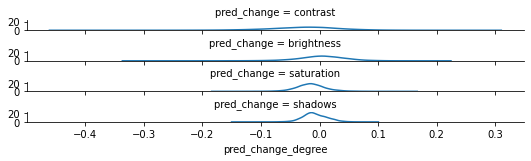

In [24]:
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

fg = sns.FacetGrid(df[(df["parameter"] == "saturation") & (df["change"] == 1.0)], row="pred_change", aspect=15, height=.5)
fg.map(sns.kdeplot, "pred_change_degree")

#fg.map(label, "pred_change")

#fg.set_titles("")
#fg.set(yticks=[])
#fg.despine(bottom=True, left=True)

In [31]:
def calculate_spearman(distortion:str, img_names=df["img"].unique()): # FIXME defaults for shadows, highlights, ...
    corr_l = []
    p_l = []
    for f in img_names:
        corr_df = df[(df["img"] == f) & ((df["parameter"] == distortion) | (df["parameter"] == "original"))][["change", "score"]]
        c, p = stats.spearmanr(corr_df["score"], corr_df["change"])
        corr_l.append(c)
        p_l.append(p)
    return sum(corr_l)/len(corr_l), sum(p_l)/len(p_l)

In [32]:
calculate_spearman("jpeg_compression")

KeyError: "['score'] not in index"